# Kaggle Titanic Demo3

In [1]:
import pylab as plt
%matplotlib inline
import numpy as np
import pandas as pd
import math

from featureEngineering6 import feature_engineering
from plot_learning_curve import plot_learning_curve

Kaggle_train=pd.read_csv('data/train.csv', sep=',')
Kaggle_test=pd.read_csv('data/test.csv', sep=',')

df_train, df_test = feature_engineering(Kaggle_train, Kaggle_test)

feature= ['Pclass','FamilySize','FamilySurvived', 'FamilyDied',
           'Title_s_Master', 'Title_s_Miss', 'Title_s_Mr', 'Title_s_Mrs',
           'Age_s_young', 'Age_s_adult', 'Age_s_elder', 
           'Cabin_s_G', 'Cabin_s_M', 'Cabin_s_X',
          ]
#KS-0.7894

feature= ['Pclass','FamilySize','FamilySurvived', 'FamilyDied',
           'Title_s_Master', 'Title_s_Miss', 'Title_s_Mr', 'Title_s_Mrs',
           'Cabin_s_G', 'Cabin_s_M', 'Cabin_s_X',
          ]
#KS-0.79426, Acc: 0.883 +/- 0.019, F1: 0.838 +/- 0.027

feature2= ['Pclass','FamilySurvived', 'FamilyDied',
           'Title_s_Master', 'Title_s_Miss', 'Title_s_Mr', 'Title_s_Mrs',
          ]
# KS-0.79426, Acc: 0.883 +/- 0.017, F1: 0.839 +/- 0.025
# KS-0.81340 by max_depth=3

feature= ['Pclass','FamilySurvived', 'FamilyDied',
           'Title_s_Master', 'Title_s_Miss', 'Title_s_Mr', 'Title_s_Mrs',
           #'Cabin_s_G', 'Cabin_s_M', 'Cabin_s_X',
          ]

# Acc: 0.886 +/- 0.017, F1: 0.842 +/- 0.025 # with max_depth = 4
# KS-0.81340 by max_depth=3

X, y = df_train[feature], Kaggle_train['Survived']

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 26 days


In [7]:
from sklearn.cross_validation import train_test_split
from sklearn import cross_validation

from sklearn.pipeline import Pipeline

from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## Train, Test split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [20]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=3)

clf = AdaBoostClassifier(
    base_estimator=tree,
    n_estimators=1000,
    learning_rate=0.1,
    random_state=0
)

In [21]:
clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
          learning_rate=0.1, n_estimators=1000, random_state=0)

In [22]:
print( 'Training Acc: %.3f' % accuracy_score(clf.predict(X_train), y_train))
print( 'Training Precision: %.3f' % precision_score(clf.predict(X_train), y_train))
print( 'Training Recall: %.3f' % recall_score(clf.predict(X_train), y_train))
print( 'Training F1: %.3f' % f1_score(clf.predict(X_train), y_train))

Training Acc: 0.899
Training Precision: 0.822
Training Recall: 0.902
Training F1: 0.860


In [23]:
print( 'Test Acc: %.3f' % accuracy_score(clf.predict(X_test), y_test))
print( 'Test Precision: %.3f' % precision_score(clf.predict(X_test), y_test))
print( 'Test Recall: %.3f' % recall_score(clf.predict(X_test), y_test))
print( 'Test F1: %.3f' % f1_score(clf.predict(X_test), y_test))

Test Acc: 0.855
Test Precision: 0.753
Test Recall: 0.873
Test F1: 0.809


## Model evaluation

In [24]:
scores = cross_validation.cross_val_score(clf, X, y, scoring='accuracy', cv=8, n_jobs=-1)
print('Cross validation check for Acc: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

Cross validation check for Acc: 0.886 +/- 0.017


In [25]:
scores = cross_validation.cross_val_score(clf, X, y, scoring='f1', cv=8, n_jobs=-1)
print('Cross validation check for F1: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

Cross validation check for F1: 0.841 +/- 0.025


In [26]:
from plot_learning_curve import plot_learning_curve

<module 'matplotlib.pyplot' from '/Users/fuyangliu/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

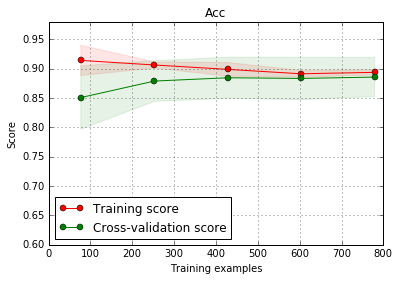

In [27]:
plot_learning_curve(clf, 'Acc', X, y, ylim=(0.6, 0.98), cv=8,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5), scoring='accuracy')

<module 'matplotlib.pyplot' from '/Users/fuyangliu/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

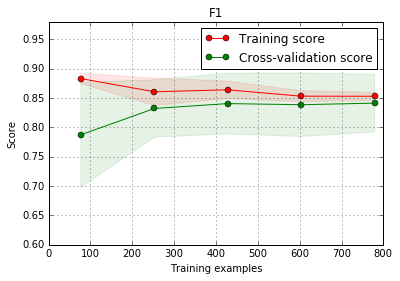

In [28]:
plot_learning_curve(clf, 'F1', X, y, ylim=(0.6, 0.98), cv=8,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5), scoring='f1')

## Prediction

In [29]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=3)

clf = AdaBoostClassifier(
    base_estimator=tree,
    n_estimators=1000,
    learning_rate=0.1,
    random_state=0
)

clf.fit(X, y)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
          learning_rate=0.1, n_estimators=1000, random_state=0)

In [30]:
Kaggle_test['Survived'] = clf.predict(df_test[feature])

In [31]:
import csv as csv
predictions_file = open("Demo3.csv", "wb")
predictions_file_object = csv.writer(predictions_file)
predictions_file_object.writerow(["PassengerId", "Survived"]) # write the column headers
predictions_file_object.writerows(zip(Kaggle_test['PassengerId'], Kaggle_test['Survived'])) # write the PassengerId, and predict 1
predictions_file.close()